In [1]:
#Make necessary imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pycaret.datasets import get_data

dataset = pd.read_csv("indian_liver_patient.csv")
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
#check the shape of data
dataset.shape

(583, 11)

In [3]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [4]:
# creating the training data
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
# creating the test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (554, 11)
Unseen Data For Predictions: (29, 11)


In [5]:
# Setting up Environment in PyCaret
from pycaret.classification import *

In [6]:
exp_clf101 = setup(data = data, target = 'Dataset', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Dataset
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(554, 11)"
5,Missing Values,True
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


PyCaret by default imputes the missing value in the dataset by ‘mean’ for numeric features and ‘constant’ for categorical features. To change the imputation method, numeric_imputation and categorical_imputation parameters can be used within setup. 

In [7]:
# Comparing Model

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7547,0.8048,0.4644,0.6744,0.5302,0.3739,0.3984,0.0280
ada,Ada Boost Classifier,0.7441,0.7920,0.4955,0.5697,0.5250,0.3541,0.3573,0.0150
xgboost,Extreme Gradient Boosting,0.7314,0.7901,0.4697,0.5622,0.5048,0.3247,0.3311,0.1920
catboost,CatBoost Classifier,0.7262,0.7982,0.4098,0.5976,0.4668,0.2928,0.3129,0.3320
rf,Random Forest Classifier,0.7236,0.7918,0.4273,0.5665,0.4702,0.2937,0.3062,0.0330
lr,Logistic Regression,0.7211,0.7821,0.3659,0.5817,0.4327,0.2630,0.2829,0.3770
gbc,Gradient Boosting Classifier,0.7184,0.7718,0.4091,0.5381,0.4588,0.2759,0.2831,0.0150
lightgbm,Light Gradient Boosting Machine,0.7183,0.7839,0.4258,0.5068,0.4571,0.2772,0.2781,0.0930
knn,K Neighbors Classifier,0.7134,0.7388,0.4947,0.5173,0.4985,0.3013,0.3051,0.2300
lda,Linear Discriminant Analysis,0.7054,0.7303,0.1644,0.4917,0.2362,0.1178,0.1423,0.0040


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [8]:
# Create a Model

lr = create_model('lr') # from the table above, we can see that LogisticRegression works the best

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7949,0.9156,0.5455,0.6667,0.6000,0.4639,0.4681
1,0.5897,0.6331,0.2727,0.2727,0.2727,-0.0130,-0.0130
2,0.7179,0.7840,0.4167,0.5556,0.4762,0.2886,0.2941
3,0.6923,0.7469,0.4167,0.5000,0.4545,0.2427,0.2447
4,0.7692,0.8920,0.5000,0.6667,0.5714,0.4179,0.4260
5,0.7179,0.7840,0.2500,0.6000,0.3529,0.2099,0.2429
6,0.6923,0.7593,0.1667,0.5000,0.2500,0.1136,0.1409
7,0.7368,0.8013,0.4545,0.5556,0.5000,0.3238,0.3268
8,0.7105,0.6869,0.3636,0.5000,0.4211,0.2344,0.2397
9,0.7895,0.8182,0.2727,1.0000,0.4286,0.3476,0.4587


In [9]:
# Tune a Model

tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8205,0.8896,0.6364,0.7000,0.6667,0.5442,0.5454
1,0.6154,0.6558,0.2727,0.3000,0.2857,0.0234,0.0234
2,0.7436,0.7932,0.5000,0.6000,0.5455,0.3689,0.3719
3,0.7179,0.7562,0.5000,0.5455,0.5217,0.3223,0.3229
4,0.7692,0.9043,0.5000,0.6667,0.5714,0.4179,0.4260
5,0.7179,0.8086,0.3333,0.5714,0.4211,0.2513,0.2673
6,0.6923,0.7130,0.1667,0.5000,0.2500,0.1136,0.1409
7,0.7105,0.7845,0.4545,0.5000,0.4762,0.2768,0.2774
8,0.7105,0.7104,0.4545,0.5000,0.4762,0.2768,0.2774
9,0.7632,0.7946,0.3636,0.6667,0.4706,0.3346,0.3601


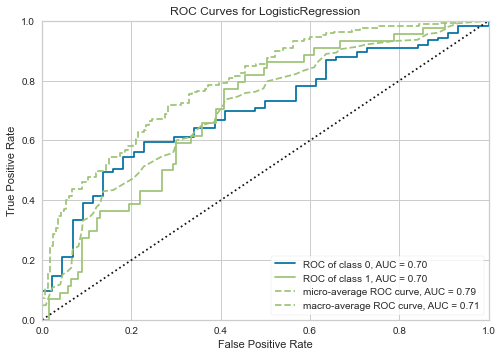

In [10]:
# Plotting Metrix
# ROC
plot_model(tuned_lr, plot = 'auc')

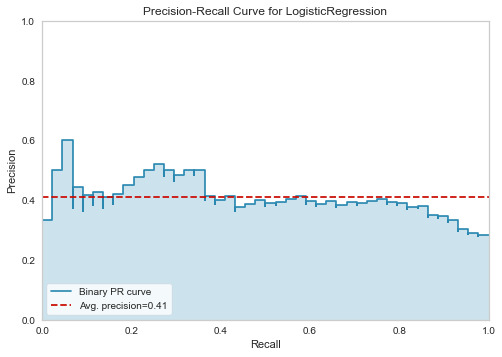

In [11]:
# Precision Recall curve
plot_model(tuned_lr, plot = 'pr')

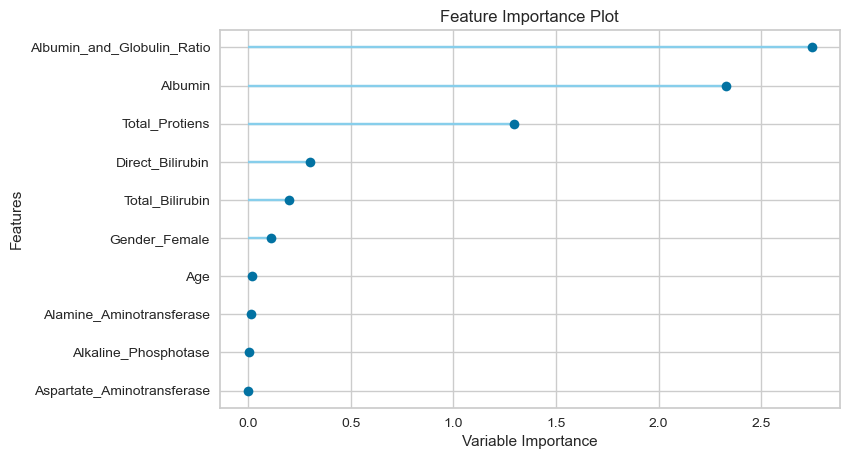

In [12]:
# Feature Importance Plot
plot_model(tuned_lr, plot='feature')

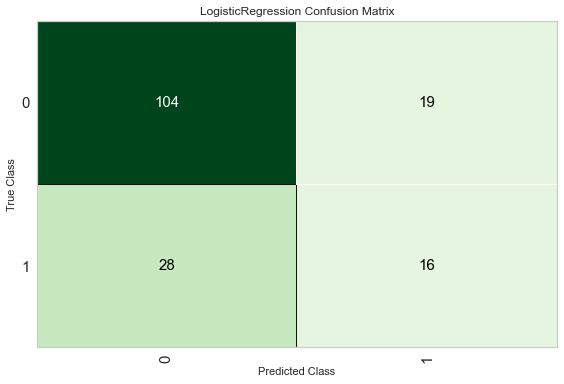

In [13]:
# Confusion Metrix

plot_model(tuned_lr, plot = 'confusion_matrix')

In [14]:
# Evaluate model

evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7186,0.6999,0.3636,0.4571,0.4051,0.2239,0.2264


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Dataset,Label,Score
0,33.0,0.900000,0.800000,680.0,37.0,40.0,5.9,2.6,0.80,0.0,1,1,0.9327
1,45.0,0.800000,0.200000,140.0,24.0,20.0,6.3,3.2,1.00,0.0,2,2,0.5629
2,40.0,30.799999,18.299999,285.0,110.0,186.0,7.9,2.7,0.50,0.0,1,1,1.0000
3,57.0,0.600000,0.100000,210.0,51.0,59.0,5.9,2.7,0.80,0.0,1,1,0.6835
4,41.0,2.700000,1.300000,580.0,142.0,68.0,8.0,4.0,1.00,0.0,1,1,0.9897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,47.0,0.800000,0.200000,236.0,10.0,13.0,6.7,2.9,0.76,1.0,2,1,0.6064
163,39.0,0.600000,0.200000,188.0,28.0,43.0,8.1,3.3,0.60,0.0,1,1,0.7044
164,60.0,22.799999,12.600000,962.0,53.0,41.0,6.9,3.3,0.90,0.0,1,1,1.0000
165,32.0,32.599998,14.100000,219.0,95.0,235.0,5.8,3.1,1.10,0.0,1,1,1.0000


In [16]:
# Predict on test data

unseen_predictions = predict_model(tuned_lr, data=data_unseen)
unseen_predictions.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Label,Score
0,73,Male,1.8,0.9,220,20,43,6.5,3.0,0.8,1,1,0.7673
1,55,Male,0.8,0.2,290,139,87,7.0,3.0,0.7,1,1,0.9539
2,51,Male,0.7,0.1,180,25,27,6.1,3.1,1.0,1,2,0.5034
3,51,Male,2.9,1.2,189,80,125,6.2,3.1,1.0,1,1,0.8618
4,51,Male,4.0,2.5,275,382,330,7.5,4.0,1.1,1,1,0.9995


In [17]:
# Save model

save_model(tuned_lr,'tuned_lr_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Dataset',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.689, class_weight={}, dual=False,
                 

In [18]:
# Create a Model

dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7179,0.6932,0.6364,0.5000,0.5600,0.3568,0.3624
1,0.6154,0.6494,0.7273,0.4000,0.5161,0.2393,0.2689
2,0.6667,0.6204,0.5000,0.4615,0.4800,0.2353,0.2357
3,0.5897,0.5417,0.4167,0.3571,0.3846,0.0796,0.0802
4,0.7436,0.6991,0.5833,0.5833,0.5833,0.3981,0.3981
5,0.5897,0.5185,0.3333,0.3333,0.3333,0.0370,0.0370
6,0.8462,0.7963,0.6667,0.8000,0.7273,0.6214,0.6264
7,0.7368,0.6532,0.4545,0.5556,0.5000,0.3238,0.3268
8,0.6579,0.5438,0.2727,0.3750,0.3158,0.0952,0.0974
9,0.6579,0.5976,0.4545,0.4167,0.4348,0.1902,0.1905


In [19]:
# Tune a Model

tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7179,0.7224,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7179,0.5795,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6923,0.5741,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6923,0.5972,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6923,0.6898,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6923,0.5417,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6923,0.6713,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7105,0.7054,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7105,0.5320,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.7105,0.6869,0.0000,0.0000,0.0000,0.0000,0.0000


In [20]:
# Evaluate model

evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…